# Data Acquisition & Instrumentation laboratories


# First 

#### Dans ces sessions, on va interfacer les instruments électroniques afin de prendre des mesures et acquiert des données de différentes manières. Trois concepts sont importants:

- Python est le language utilisé pour metttre en oeuvre les solutions

- Visa qui est un standard API (Interface de programmation d'Application) qui favorise la communication 

- SCPI (standard commands for programmable intruments) est le protocle de communication standarisé pour contrôler les intruments de mesure.

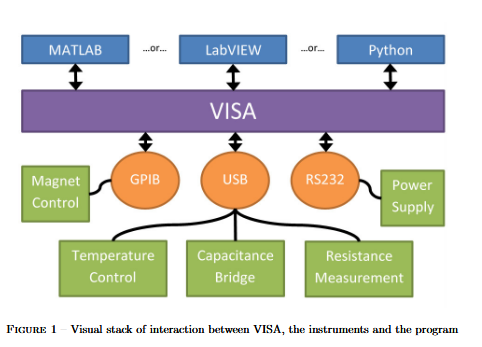

# Introduction

# VISA

C'est d'abord Visual Instrument Software Architecture, appelé généralement VISA, est une interface de programmation largement utilsée dans le domaine de l'instrumentation et l'industrie du test et de la mesure. Il permet une communicaiton avec des instruments de mesure depuis un ordinateur.

Tout cela est utilisé dans le but de rendre la programmation des intruments indépendante de l'interface physique utilisée (bus GPIB, RS-232, USB).



on a besoin d'un software avec des programmes puis, un driver usb (generateur de signal), Ethernet LA ou USB (oscillocpe) et GPIB (multimetre).

# j'aimerais travailler avec les environnements virtuels pour ne pas avoir des dependances.

- création : python -m venv venv
- activation : .\venv\Scripts\activate
- ajout des dependances dans requirement.txt puis : pip install -r requirements.txt
- Après il faut s'assurer de lancer en tant que SuperUtilsateur s'il faut. 

# Session 1 : the function generator - Rigol DG1022

### La première de chose est de s'assurer de bien être connecté avec l'ID. 

- ID attend

- voici ce que j'ai : USB0::0x0400::0x09C4::DG1F143800627::INSTR

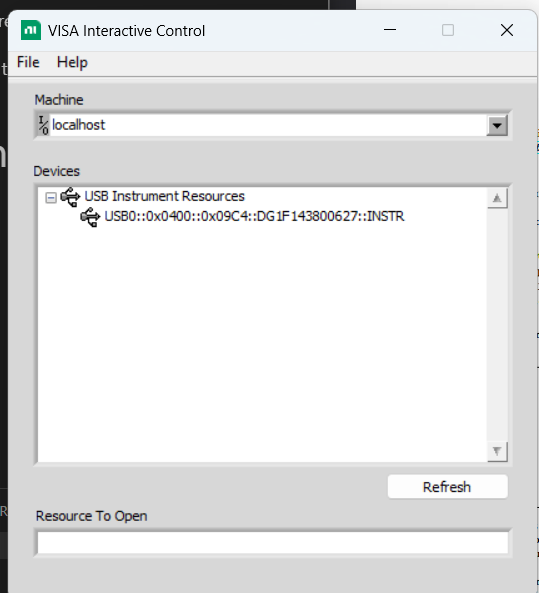

# Imports

In [2]:

import pyvisa, time


## 1) ID , on attends un truc du genre :
 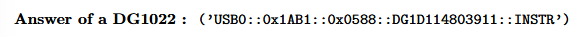

In [2]:

rm = pyvisa.ResourceManager()       # sans '@py' car on uutlise NI-VISA
ID=rm.list_resources()
print("generateur:",ID)




generateur: ('USB0::0x0400::0x09C4::DG1F143800623::INSTR', 'USB0::0x1AB1::0x04CE::DS1ZC212301111::INSTR', 'ASRL7::INSTR', 'ASRL8::INSTR')


# Open and Close Channel 1 ten times with delay of one second between the steps 

Pour commencer à créer un code simple qui ouvrira et fermera Channel 1 dix fois avec un délai de
une seconde entre les étapes (heure d'importation pour vous aider). Pour communiquer correctement, c’est
important d'ouvrir le gestionnaire de ressources avec l'ID de votre appareil et de créer votre instru-
Mentez dans le code. Pour cette étape, utilisez la fonction open_resources(ID) sur la variable
de votre gestionnaire de ressources et le stocker dans une variable qui correspondra à votre instrument
(exemple: osci = rm.open_resource(ID)). N’oubliez pas de fermer la communication
avec votre instrument et le gestionnaire de ressources après l'exécution de votre code

- Tout d'abord on a cette regle à suivre : 
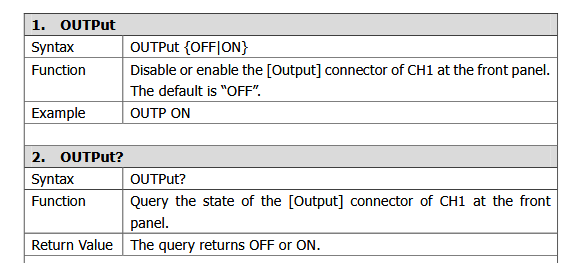


In [3]:

# ici je commente car je prends l'ID d'une liste
generator = rm.open_resource(ID[0])  # ouvrir le premier instrument de la liste

generator.timeout = 10000  # definir le timeout a 5000 ms
generator.read_termination = '\n'  # definir le caractere de fin de lecture
generator.write_termination = '\n'  # definir le caractere de fin d'ecriture
generator.chunk_size = 102400  # definir la taille du buffer
generator.clear()  # vider les buffers de l'instrument

generator.write("OUT ON")  # activation ch1
time.sleep(10)  # attendre 10 s
print("Etat CH1 : ON")
# print("Etat CH1 :", generator.query("OUT?"))  # envoyer la commande OUT? et afficher la reponse



generator.write("OUT OFF")  # desactivation ch1
time.sleep(1)  # attendre 10 s
print("Etat CH1 : OFF")
#print("Etat CH1 :", generator.query("OUT?"))  # envoyer la commande OUT? et afficher la reponse


generator.write("OUTP:CH2 ON")  # activation ch2
time.sleep(2)  # attendre 10 s
print("Etat CH2 : ON")
# print("Etat CH2 :", generator.query("OUT?"))  # envoyer la commande OUT? et afficher la reponse



generator.write("OUTP:CH2 OFF")  # desactivation ch2
time.sleep(2)  # attendre 10 s
print("Etat CH2 : OFF")
#print("Etat CH2 :", generator.query("OUT?"))  # envoyer la commande OUT? et afficher la reponse




Etat CH1 : ON
Etat CH1 : OFF
Etat CH2 : ON
Etat CH2 : OFF


# ??? 

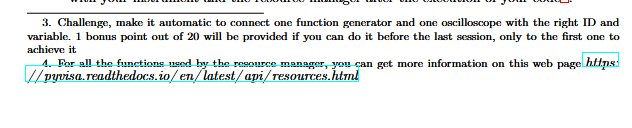

# 3) Function Sinus 5V on CH1 and Square 3V on CH2. 

- basé sur le manuel de programmation, explorer les fonctionnalités afin de créer un sinus de
5V sur le canal 1 et un carré de 3 volts sur le canal 2. Pour visualiser les ondes générées, vous
peut utiliser l'oscilloscope et les fils BNC dans le laboratoire

- Square :

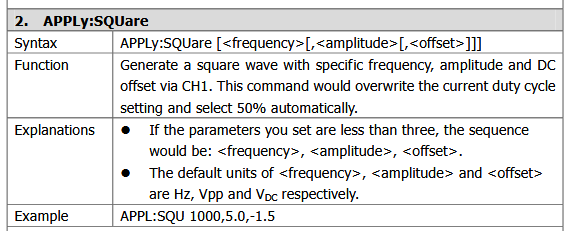

- Sinus : 

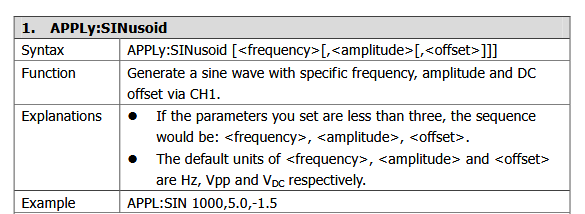

- Functions: 

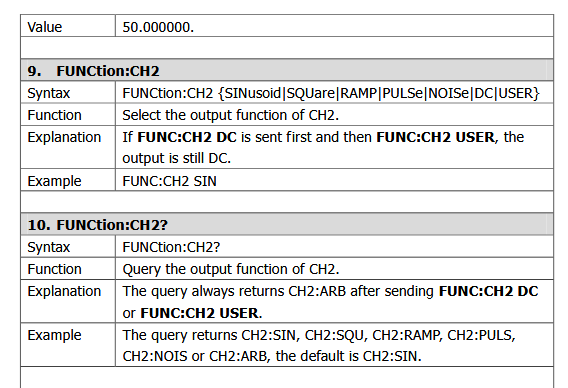

- il faut : 

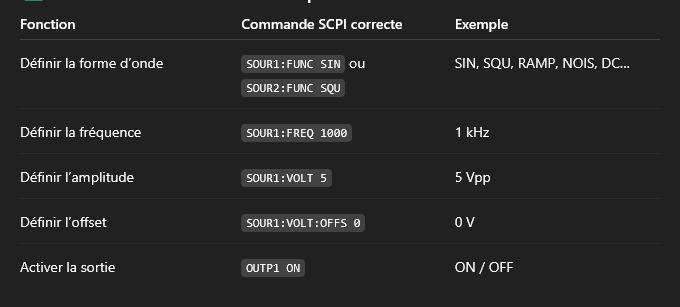

In [4]:
# === Canal 1 : SINUS 5Vpp à 1kHz ===
generator.write("APPL:SIN 1000,5.0,-1.5")  # configurer CH1
generator.write("OUTP1 ON")             # activer la sortie CH1
print("CH1 -> SIN 1kHz 5Vpp activé")

time.sleep(1)  # attendre 10 s

# === Canal 2 : SQUARE 3Vpp à 500Hz ===
generator.write("APPLy:SQUare:CH2 1000,3.0,-180,0")  # duty cycle 50%
generator.write("OUTP2 ON")             # activer la sortie CH2
print("CH2 -> SQU 500Hz 3Vpp activé")
time.sleep(1)



CH1 -> SIN 1kHz 5Vpp activé
CH2 -> SQU 500Hz 3Vpp activé


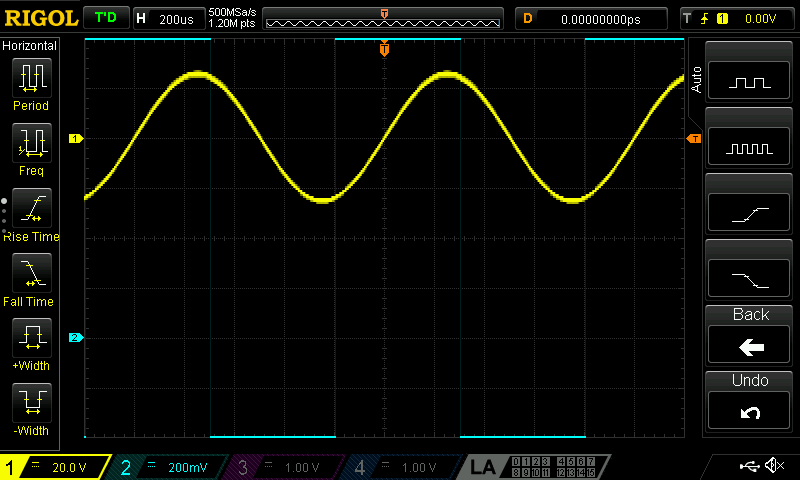

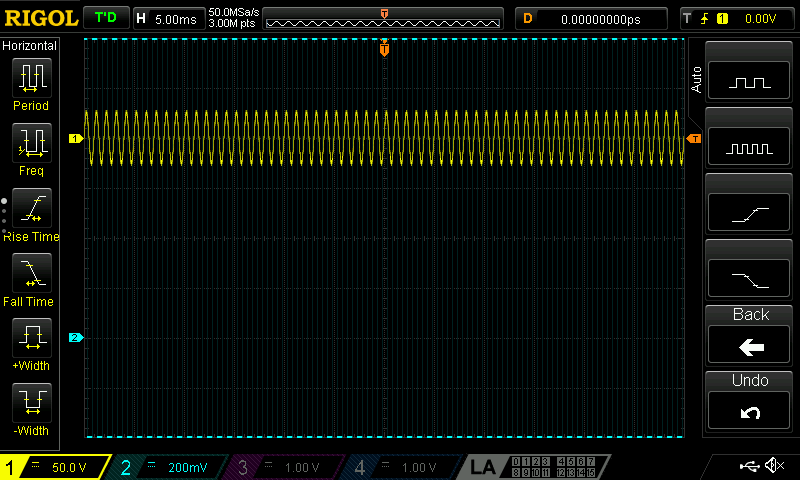

### 4) On a breadboard use a capacitor to flatten an exponential wave generate by the generator (find right information in the manual) wathc your signal on the oscillocope.

In [ ]:
generator = rm.open_resource(ID[0]) 
generator.write("APPL:EXP 1000,5,0")  # configurer CH1 signal exponentiel
generator.write("OUTP1 ON")             # activer la sortie CH1
print("CH1 -> EXP 1kHz 5Vpp activé")

time.sleep(60)  # attendre 60 s






CH1 -> EXP 1kHz 5Vpp activé


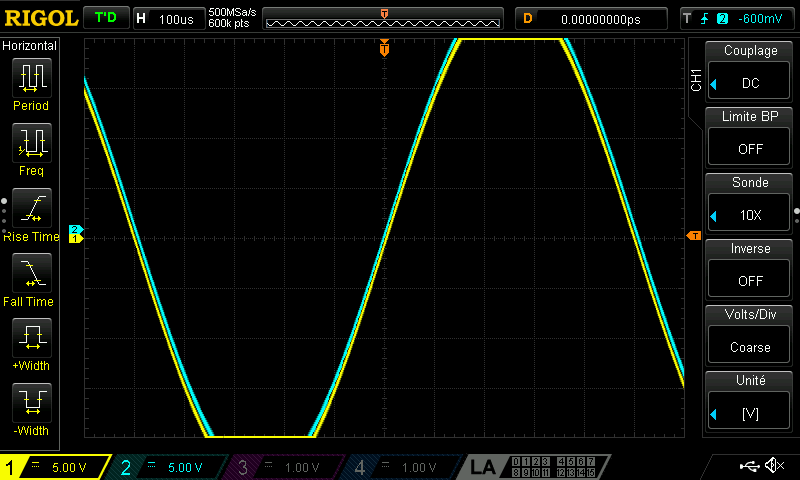

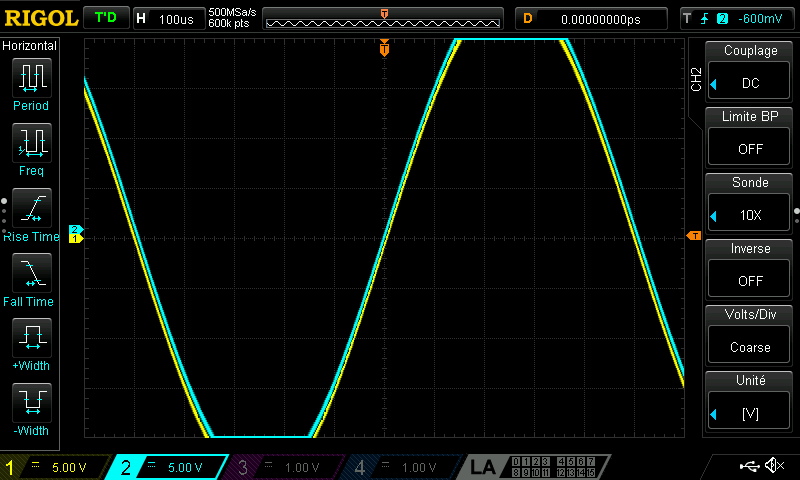

### 5) To be complete, create a sinusoidal signal on channel 1 that has:
- a frequency of 1250 hz
- an offset of 2.3 V
- a daty-cycle of 60%
- an amplitude changing every 2 seconds form 2.3V to 4.6V

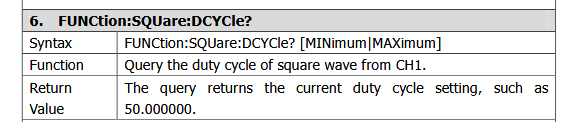

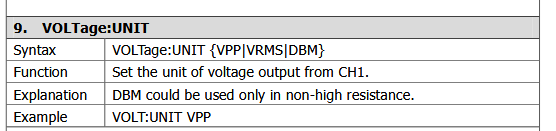

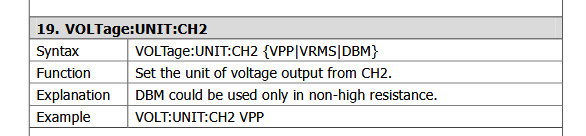

In [ ]:
import pyvisa, time

rm = pyvisa.ResourceManager()
IDs = rm.list_resources()
gen = rm.open_resource(IDs[0])

gen.timeout = 5000
gen.read_termination  = '\n'
gen.write_termination = '\n'
#gen.write("OUTP1 ON")  # activer la sortie CH1
#time.sleep(2)
#gen.write("*RST")            # reset complet
#gen.write("*CLS")


#gen.write("VOLT:UNIT VPP")   # amplitude en Vpp
gen.write("APPL:SQU:CH1 1250,2.3,2.3")   # f=1250Hz, 2.3 Vpp, offset 2.3 V
gen.write("SOUR1:SQU:DCYC 60")  # duty cycle 60 %
print("CH1 -> SQ 1.25kHz 2.3Vpp activé")
print("Générateur configuré en SQUARE 1.25kHz 2.3Vpp 60% duty cycle")

gen.write(f"SOUR1:VOLT 3.3")  # initialiser amplitude à 3.3Vpp
time.sleep(2)

# boucle amplitude min/max limitée
gen.write("SOUR1:VOLT:MIN 2.3")
gen.write("SOUR1:VOLT:MAX 4.6")
for amp in range(23, 47, 1):  # de 2.3V à 4.6V par pas de 0.1V
    voltage = amp / 10.0
    gen.write(f"SOUR1:VOLT {voltage}")
    print(f"Amplitude réglée à {voltage} Vpp")
    time.sleep(2)


gen.write("OUT OFF")  # desactivation ch1
time.sleep(1)  # attendre 10 s
print("Etat CH1 : OFF")
gen.close()
rm.close()


CH1 -> SQ 1.25kHz 2.3Vpp activé
Générateur configuré en SQUARE 1.25kHz 2.3Vpp 60% duty cycle
Amplitude réglée à 2.3 Vpp
Amplitude réglée à 2.4 Vpp
Amplitude réglée à 2.5 Vpp
Amplitude réglée à 2.6 Vpp
Amplitude réglée à 2.7 Vpp
Amplitude réglée à 2.8 Vpp
Amplitude réglée à 2.9 Vpp
Amplitude réglée à 3.0 Vpp
Amplitude réglée à 3.1 Vpp
Amplitude réglée à 3.2 Vpp
Amplitude réglée à 3.3 Vpp
Amplitude réglée à 3.4 Vpp
Amplitude réglée à 3.5 Vpp
Amplitude réglée à 3.6 Vpp
Amplitude réglée à 3.7 Vpp
Amplitude réglée à 3.8 Vpp
Amplitude réglée à 3.9 Vpp
Amplitude réglée à 4.0 Vpp
Amplitude réglée à 4.1 Vpp
Amplitude réglée à 4.2 Vpp
Amplitude réglée à 4.3 Vpp
Amplitude réglée à 4.4 Vpp
Amplitude réglée à 4.5 Vpp
Amplitude réglée à 4.6 Vpp
Etat CH1 : OFF


In [ ]:
import pyvisa
import time

# -----------------------------
# Connexion au générateur
# -----------------------------
rm = pyvisa.ResourceManager()
gen = rm.open_resource('USB0::0x0400::0x09C4::DG1F143800623::INSTR')

gen.timeout = 5000
gen.read_termination  = '\n'
gen.write_termination = '\n'

# (Optionnel) reset propre
gen.write("*RST")
gen.write("*CLS")
time.sleep(1)

# -----------------------------
# Config signal carré sur CH1
# -----------------------------
# Tension en Vpp
gen.write("SOUR1:VOLT:UNIT VPP")

# Signal carré : 1250 Hz, 2.3 Vpp, offset 2.3 V
gen.write("APPLy:SQUare 1250,2.3,2.3")

# Duty-cycle 60 %
gen.write("SOUR1:SQU:DCYC 60")

# Activer la sortie CH1
gen.write("OUTP1 ON")
print("CH1 : carré 1250 Hz, 2.3 Vpp, offset 2.3 V, duty 60 %")
time.sleep(2)

# -----------------------------
# Balayage d’amplitude 2.3 → 4.6 Vpp
# -----------------------------
for amp in range(23, 47):       # 23 → 46 = 2.3 V → 4.6 V
    voltage = amp / 10.0        # pas de 0.1 V
    gen.write(f"SOUR1:VOLT {voltage}")

    # On lit pour vérifier ce que le géné applique réellement
    try:
        current = gen.query("SOUR1:VOLT?")
        print(f"Demande = {voltage:.1f} Vpp | Générateur = {current.strip()} Vpp")
    except:
        print(f"Demande = {voltage:.1f} Vpp (lecture impossible)")

    time.sleep(2)               # 2 s entre chaque valeur

# (à toi de voir si tu coupes la sortie à la fin ou pas)
gen.write("OUTP1 OFF")

gen.close()
rm.close()


VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

In [1]:
import pyvisa

rm = pyvisa.ResourceManager()
res = "USB0::0x0400::0x09C4::DG1D210100024::INSTR"
dev = rm.open_resource(res)
dev.timeout = 5000
dev.read_termination  = '\n'
dev.write_termination = '\n'

print(dev.query("*IDN?"))

dev.close()
rm.close()


VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.